# Basic usage of oatomobile

In [1]:
%load_ext autoreload
%autoreload 2

## Use as gym environment

In [6]:
import oatomobile
from oatomobile.envs import CARLAEnv
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import oatomobile.envs

### Test weather

In [3]:
environment = CARLAEnv(town="Town01", weather="ClearSunset")

In [4]:
observation = environment.reset()

/apps/conda/wyao1/envs/py35/lib/python3.5/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [5]:
environment.simulator._sensors

['front_camera_depth',
 'front_camera_segmented',
 'traffic_light_state',
 'goal',
 'lidar',
 'collision',
 'is_at_traffic_light',
 'lane_invasion',
 'rotation',
 'front_camera_rgb',
 'location',
 'rear_camera_segmented',
 'velocity',
 'control',
 'left_camera_rgb',
 'rear_camera_depth',
 'rear_camera_rgb',
 'right_camera_depth',
 'bird_view_camera_cityscapes',
 'right_camera_segmented',
 'left_camera_depth',
 'bird_view_camera_rgb',
 'right_camera_rgb',
 'left_camera_segmented',
 'predictions']

In [6]:
observation.keys()

dict_keys(['predictions', 'velocity', 'bird_view_camera_cityscapes', 'traffic_light_state', 'left_camera_segmented', 'goal', 'rotation', 'left_camera_rgb', 'is_at_traffic_light', 'control', 'lane_invasion', 'right_camera_segmented', 'rear_camera_rgb', 'lidar', 'collision', 'front_camera_segmented', 'right_camera_rgb', 'location', 'front_camera_rgb', 'bird_view_camera_rgb', 'rear_camera_segmented'])

In [16]:
observation['right_camera_depth'].shape

(600, 800, 3)

In [37]:
plt.imshow(observation['right_camera_rgb'])
plt.axis('off');

NameError: name 'observation' is not defined

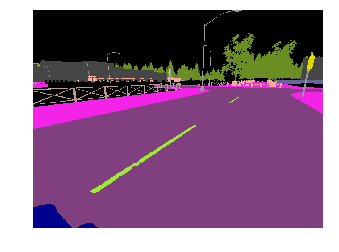

In [23]:
plt.imshow(observation['left_camera_segmented'])
plt.axis('off');

In [24]:
observation["rotation"]

array([ 6.9531323e-03,  1.7999989e+02, -1.2756347e-02], dtype=float32)

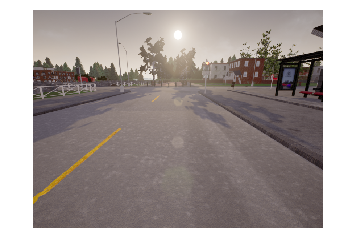

In [22]:
plt.imshow(observation['front_camera_rgb'])
plt.axis('off');

### Test autopilot

In [91]:
# Rule-based agents.
import oatomobile.baselines.rulebased
agent = oatomobile.baselines.rulebased.AutopilotAgent(environment=environment)

In [230]:
action = agent.act(observation)
new_observation, reward, done, info = environment.step(action)
agent.update(observation, action, new_observation)
observation = new_observation

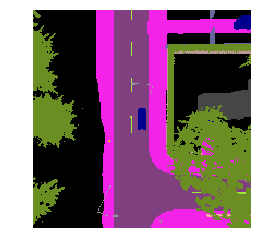

In [41]:
plt.imshow(observation['bird_view_camera_cityscapes'])
plt.axis('off');

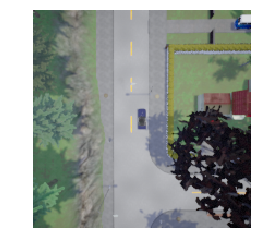

In [36]:
plt.imshow(observation['bird_view_camera_rgb'])
plt.axis('off');

(0, 16)

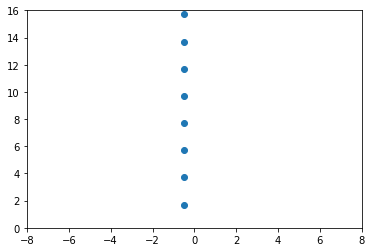

In [38]:
plt.scatter(observation['goal'][:,1], observation['goal'][:,0])
plt.xlim([-8,8])
plt.ylim([0,16])

In [25]:
environment.close()

### Test data collector and post-processing

In [1]:
from oatomobile.datasets.carla import CARLADataset

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
data = CARLADataset("raw")

In [3]:
import numpy as np

In [397]:
fname = "/data/datasets/carla/data_oatomobile_processed/2ffaada7e0cc4ce7854397089e8e2377.npz"

In [398]:
datum = np.load(fname)

In [399]:
datum["mode"]

array([2])

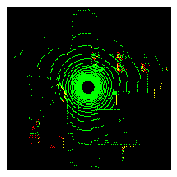

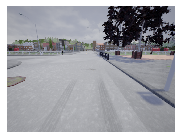

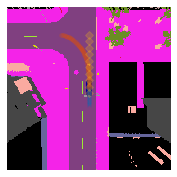

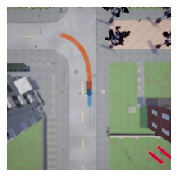

In [400]:
data.plot_datum(fname,"cache/output_dir")

In [48]:
data.process(
    dataset_dir =  "/data/datasets/carla/data_oatomobile/",
    output_dir =   "/data/datasets/carla/data_oatomobile_processed/",    
    future_length = 80,
    past_length = 20,
    num_frame_skips = 5,
    grid_res = 0.5,
    grid_size = (64,64))

0it [00:00, ?it/s]
100%|██████████| 281/281 [04:20<00:00,  1.08it/s]
1it [04:20, 260.96s/it]


In [6]:
import numpy as np

In [7]:
datum = np.load("/data/datasets/carla/data_oatomobile_processed/4729fdadddc54be78a03f3129af7cf82.npz")

In [8]:
datum["mode"]

array([0])

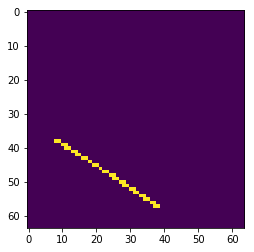

In [175]:
plt.imshow(datum["waypoints_ohe"])

In [223]:
datum["player_future_control"]

array([[ 1.0000000e+00,  1.3345449e-01,  0.0000000e+00],
       [ 1.0000000e+00,  1.3073099e-01,  0.0000000e+00],
       [ 1.0000000e+00,  1.2520052e-01,  0.0000000e+00],
       [ 1.0000000e+00,  1.1134231e-01,  0.0000000e+00],
       [ 1.0000000e+00,  9.9027358e-02,  0.0000000e+00],
       [ 1.0000000e+00,  8.8338092e-02,  0.0000000e+00],
       [ 1.0000000e+00,  4.7306740e-03,  0.0000000e+00],
       [ 1.0000000e+00,  4.3060154e-02,  0.0000000e+00],
       [ 1.0000000e+00,  5.7867069e-02,  0.0000000e+00],
       [ 1.0000000e+00,  4.9933393e-02,  0.0000000e+00],
       [ 1.0000000e+00,  3.5811257e-02,  0.0000000e+00],
       [ 1.0000000e+00,  2.7030410e-02,  0.0000000e+00],
       [ 1.0000000e+00,  2.3601780e-02,  0.0000000e+00],
       [ 1.0000000e+00, -4.3154933e-02,  0.0000000e+00],
       [ 1.0000000e+00, -5.6334413e-03,  0.0000000e+00],
       [ 1.0000000e+00,  1.7718147e-02,  0.0000000e+00],
       [ 1.0000000e+00,  2.0100195e-02,  0.0000000e+00],
       [ 1.0000000e+00, -4.6616

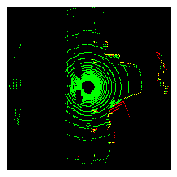

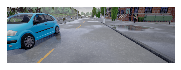

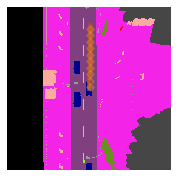

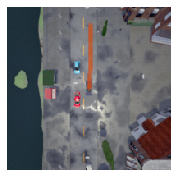

In [225]:
data.plot_datum("/data/datasets/carla/data_oatomobile_processed/4729fdadddc54be78a03f3129af7cf82.npz", "cache/")

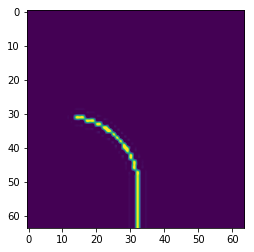

In [108]:
plt.imshow(datum["waypoints_ohe"], interpolation="spline36")

In [30]:
datum.files

['lane_invasion',
 'rotation',
 'velocity',
 'control',
 'lidar',
 'predictions',
 'player_future',
 'front_camera_rgb',
 'collision',
 'goal',
 'is_at_traffic_light',
 'bird_view_camera_rgb',
 'traffic_light_state',
 'location',
 'bird_view_camera_cityscapes',
 'player_past']

In [33]:
datum['goal']

array([[ 0.05623686, -0.0297336 , -0.02662943],
       [ 2.0560293 , -0.05853968, -0.02663984],
       [ 4.055822  , -0.08734196, -0.02665025],
       [ 6.0556145 , -0.11614804, -0.02666066],
       [ 8.055408  , -0.14495413, -0.02667107],
       [10.0552    , -0.1737602 , -0.02668148],
       [12.054993  , -0.2025663 , -0.02669189],
       [14.054785  , -0.23137239, -0.02670231],
       [16.054592  , -0.2601787 , -0.02671272],
       [18.054384  , -0.28898478, -0.02672313]], dtype=float32)

In [31]:
datum['player_past']

array([[-3.82453258e-09, -1.22358464e-07, -3.96080296e-04],
       [-2.56809366e-09, -8.21611503e-08, -2.65959638e-04],
       [-1.24169071e-09, -3.97254737e-08, -1.28593290e-04],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.10429862e-09,  3.53298815e-08,  1.14364544e-04],
       [ 1.10429862e-09,  3.53298815e-08,  1.14364544e-04],
       [ 1.10429862e-09,  3.53298815e-08,  1.14364544e-04],
       [ 1.10429862e-09,  3.53298815e-08,  1.14364544e-04],
       [ 1.10429862e-09,  3.53298815e-08,  1.14364544e-04],
       [ 1.10429862e-09,  3.53298815e-08,  1.14364544e-04],
       [ 1.10429862e-09,  3.53298815e-08,  1.14364544e-04],
       [ 1.10429862e-09,  3.53298815e-08,  1.14364544e-04],
       [ 1.10429862e-09,  3.53298815e-08,  1.14364544e-04],
       [ 1.10429862e-09,  3.53298815e-08,  1.14364544e-04],
       [-3.36077356e-09, -1.07521398e-07, -3.48051993e-04],
       [-4.86473048e-09, -1.55637568e-07, -5.03806373e-04],
       [-4.75386716e-09, -1.52090712e-07

In [35]:
datum['player_future']

KeyError: 'player_future is not a file in the archive'